![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dropout
from sklearn.preprocessing import StandardScaler
from livelossplot import PlotLossesKeras
from keras import backend as K
import keras.optimizers as opts
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [4]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


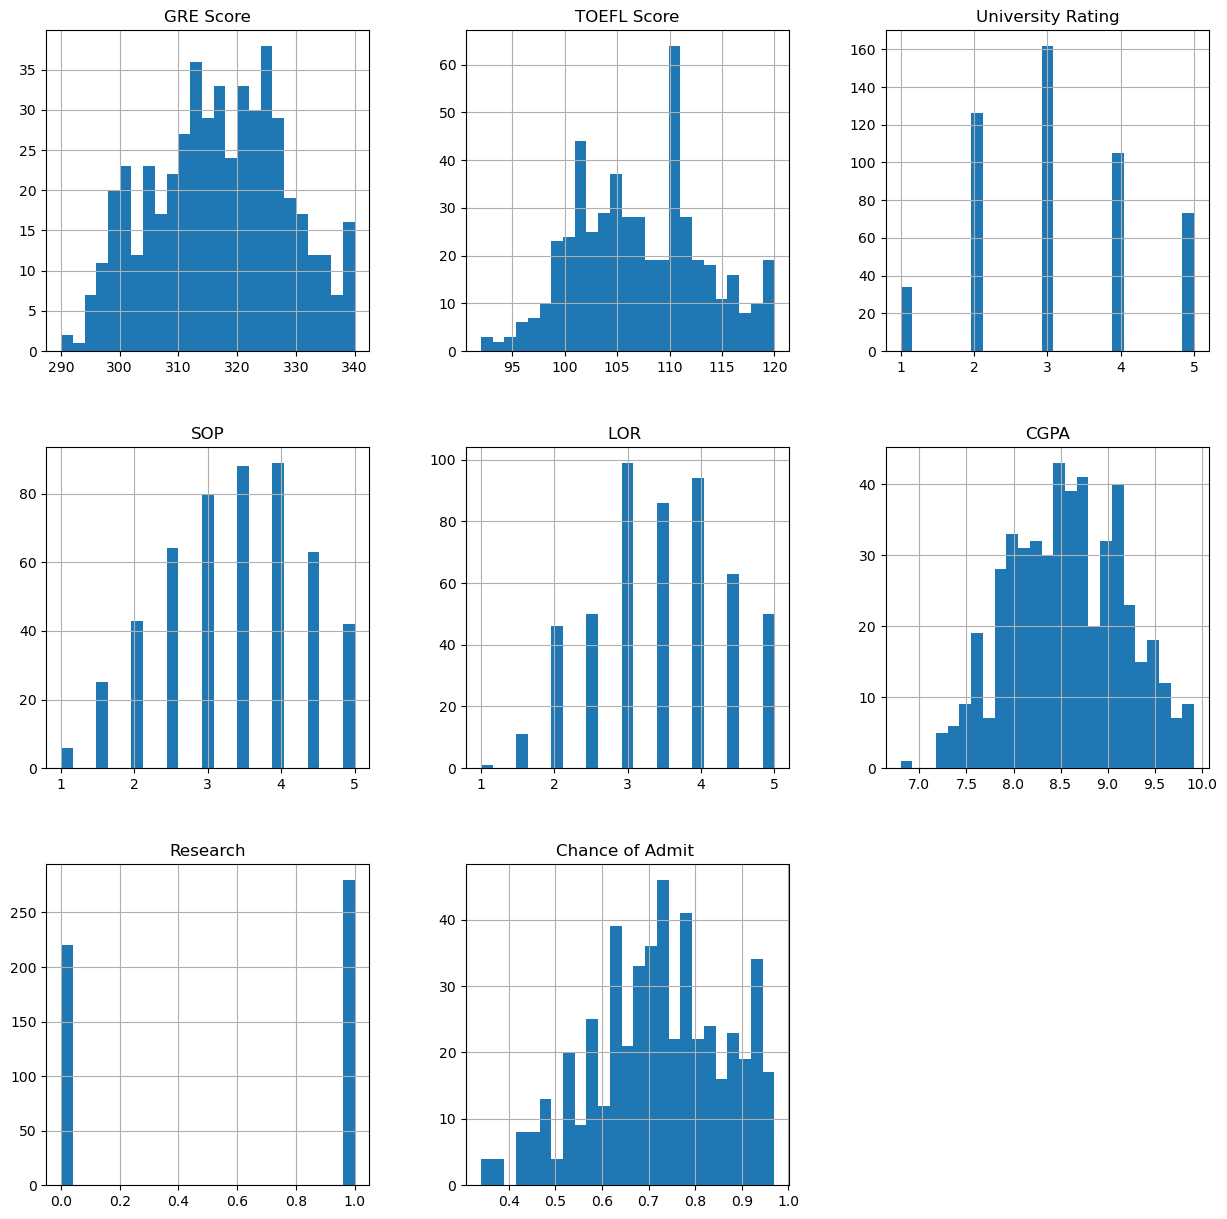

In [4]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [5]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
#No funciona con esta definición de Y
# Y = data[data.columns[-1]] 
Y = pd.DataFrame(data[data.columns[-1]])

In [6]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [7]:
# Normalización de variables predictoras
scaler = StandardScaler()

# Transformación de los set de entrenamiento y test
xTrain = pd.DataFrame(data=scaler.fit_transform(xTrain), columns=xTrain.columns, index=xTrain.index)
xTest = pd.DataFrame(data=scaler.transform(xTest), columns=xTest.columns, index=xTest.index)

xTrain = np.array(xTrain)
yTrain = np.array(yTrain)

xTest = np.array(xTest)
yTest = np.array(yTest)

In [8]:
# Definición de dimensiones de salida, variables de interés
output_var = yTrain.shape[1]
print(output_var, ' output variables')

1  output variables


In [9]:
# Definición de dimensiones de entrada, variables predictoras
dims = xTrain.shape[1]
print(dims, 'input variables')

7 input variables


## Error cuadrático medio

In [18]:
# Celda 1
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(output_var, input_shape=(dims,)))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 8         
                                                                 
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________
None


In [19]:
# Definición de función de perdida
model.compile(optimizer='sgd', loss='mean_squared_error')

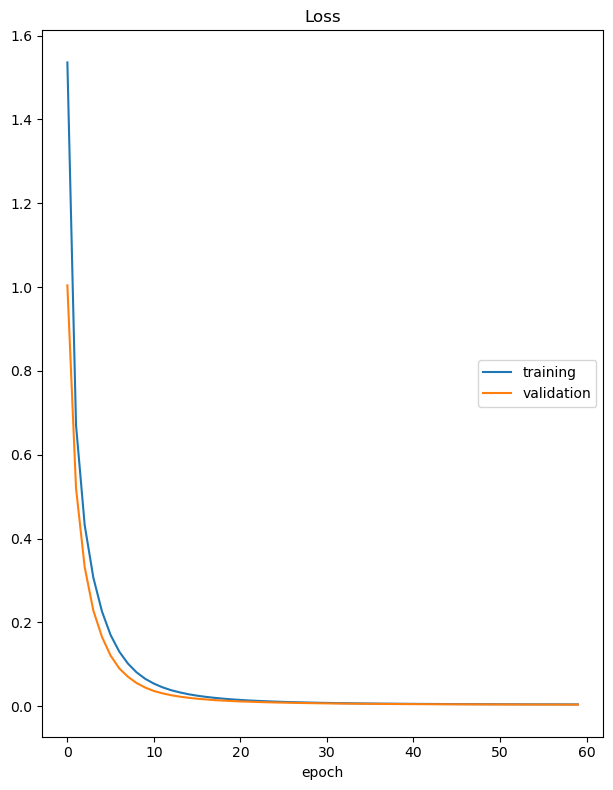

Loss
	training         	 (min:    0.004, max:    1.536, cur:    0.004)
	validation       	 (min:    0.004, max:    1.004, cur:    0.004)
11/11 [==============================] - 0s 21ms/step - loss: 0.0041 - val_loss: 0.0036


In [20]:
# Entrenamiento de la red neuronal con 50 épocas
model.fit(xTrain, yTrain, 
          verbose=1, 
          epochs=60, 
          validation_data=(xTest, yTest),
          callbacks=[PlotLossesKeras()])

Aquí observamos que el modelo se estabiliza alrededor de los 30 epochs, por lo que consideraremos este número de epoch para calcular el val loss.

In [21]:
val_loss_1 = model.evaluate(xTest, yTest)
val_loss_1

5/5 [==============================] - 0s 2ms/step - loss: 0.0036


0.003610810497775674

## Error absoluto medio

In [22]:
# Celda 1
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(output_var, input_shape=(dims,)))

In [23]:
# Definición de función de perdida
model.compile(optimizer='sgd', loss='mean_absolute_error')

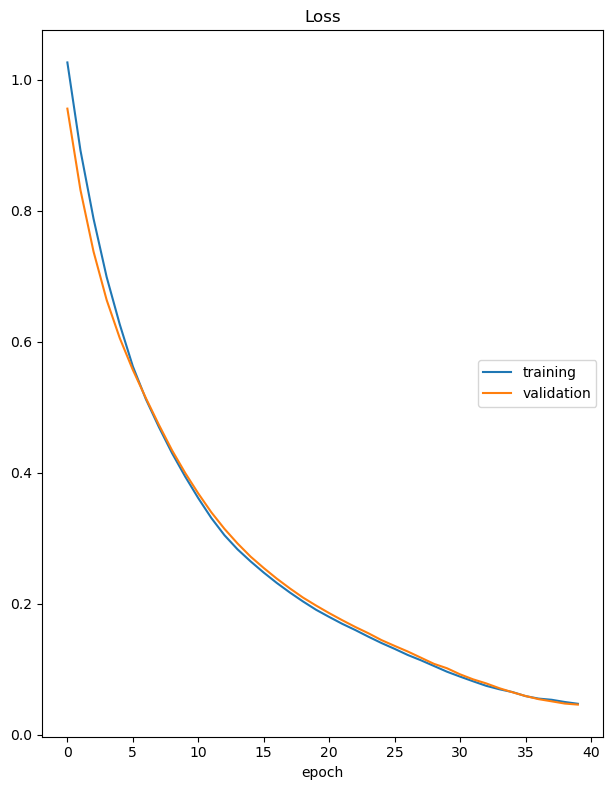

Loss
	training         	 (min:    0.047, max:    1.026, cur:    0.047)
	validation       	 (min:    0.046, max:    0.956, cur:    0.046)
11/11 [==============================] - 0s 25ms/step - loss: 0.0472 - val_loss: 0.0459


In [24]:
# Entrenamiento de la red neuronal con 50 épocas
model.fit(xTrain, yTrain, 
          verbose=1, 
          epochs=40, 
          validation_data=(xTest, yTest),
          callbacks=[PlotLossesKeras()])

Aquí el val_loss parece estabilizarse en un valor de Epoch cercano a los 40. El val_loss es significativamente más alto que el del modelo evaluado con MSE.

In [25]:
val_loss_2 = model.evaluate(xTest, yTest)
val_loss_2

5/5 [==============================] - 0s 2ms/step - loss: 0.0459


0.04591890797019005

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

## Error cuadrático medio

In [29]:
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Capa entrada
model.add(Dense(256, input_shape=(dims,),activation='relu'))
model.add(Dense(output_var))
model.add(Activation('relu'))

# Impresión de la arquitectura de la red neuronal
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2048      
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 2,305
Trainable params: 2,305
Non-trainable params: 0
_________________________________________________________________
None


In [30]:
model.compile(optimizer='sgd', loss='mean_squared_error')

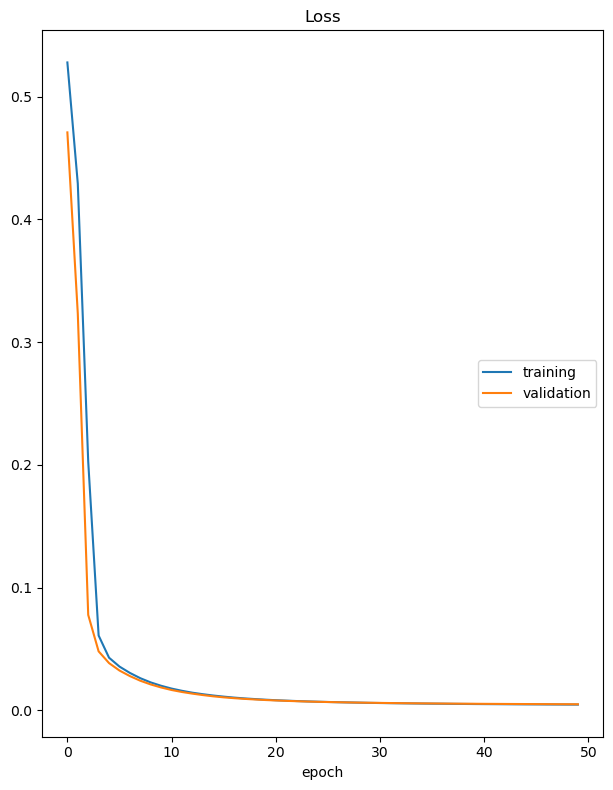

Loss
	training         	 (min:    0.005, max:    0.528, cur:    0.005)
	validation       	 (min:    0.005, max:    0.471, cur:    0.005)
11/11 [==============================] - 0s 20ms/step - loss: 0.0047 - val_loss: 0.0050


In [31]:
model.fit(xTrain, yTrain,
          validation_data=(xTest, yTest),
          epochs=50, 
          callbacks=[PlotLossesKeras()])

En la función con dos capas, optimizando con el gradient descent, y usando MSE como hiper parametro, podemos observar una función estabilizada alrededor de los 30 epochs. La función de costos parece ser un poco más alta que la del mismo modelo pero con una sola capa.

In [32]:
val_loss_3 = model.evaluate(xTest, yTest)
val_loss_3

5/5 [==============================] - 0s 3ms/step - loss: 0.0050


0.004965325817465782

# Error absoluto medio

In [33]:
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Capa entrada
model.add(Dense(256, input_shape=(dims,),activation='relu'))
model.add(Dense(output_var))
model.add(Activation('relu'))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2048      
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 2,305
Trainable params: 2,305
Non-trainable params: 0
_________________________________________________________________
None


In [34]:
model.compile(optimizer='sgd', loss='mean_absolute_error')

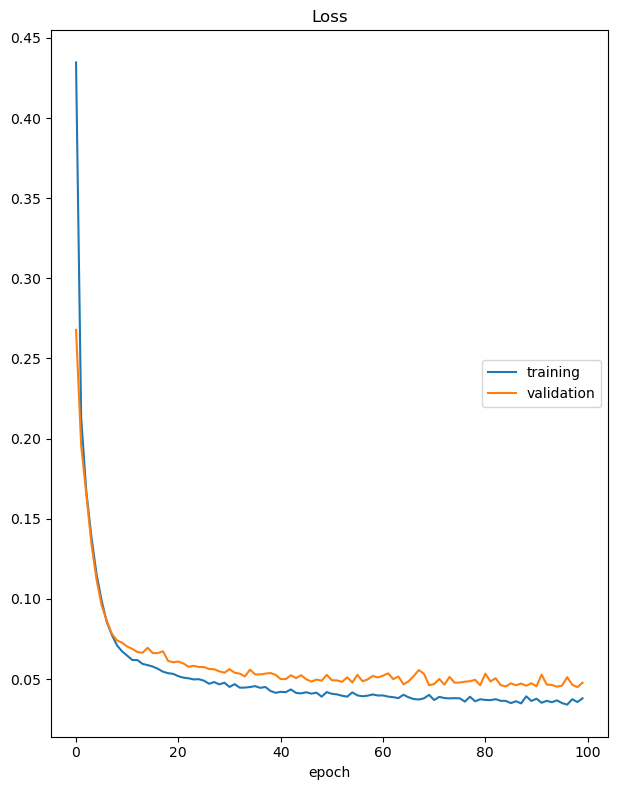

Loss
	training         	 (min:    0.034, max:    0.435, cur:    0.038)
	validation       	 (min:    0.045, max:    0.268, cur:    0.048)
11/11 [==============================] - 0s 19ms/step - loss: 0.0379 - val_loss: 0.0477


In [35]:
model.fit(xTrain, yTrain,
          validation_data=(xTest, yTest),
          epochs=100, 
          callbacks=[PlotLossesKeras()])

Cuando nuestro modelo utiliza el hiper parametro MAE, su desempeño en terminos de función de costo, parece ser muy cercano a 0.05, que es significativamente mayor a la función de costos usando MSE.

In [36]:
val_loss_4 = model.evaluate(xTest, yTest)
val_loss_4

5/5 [==============================] - 0s 3ms/step - loss: 0.0477


0.04767746105790138

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

## Error cuadrático medio

In [42]:
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(256, input_shape=(dims,),activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(output_var))
model.add(Activation('relu'))
#porcentaje de neuronas que se desactivaran en la red neuronal en las capas ocultas
model.add(Dropout(0.5))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2048      
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
 dropout (Dropout)           (None, 1)                 0         
                                                                 
Total params: 68,097
Trainable params: 68,097
Non-trainable params: 0
_________________________________________________________________
None


In [43]:
model.compile(optimizer='sgd', loss='mean_squared_error')

In [44]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1) 

In [45]:
fBestModel = 'MSE_model.h5'
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

In [46]:
model.fit(xTrain, yTrain, 
          verbose=True, 
          epochs=50, 
          batch_size=128,
          validation_data=(xTest,yTest),
          callbacks=[best_model, early_stop])

Epoch 1/50
3/3 [==============================] - 0s 73ms/step - loss: 0.5087 - val_loss: 0.4456
Epoch 2/50
3/3 [==============================] - 0s 31ms/step - loss: 0.4742 - val_loss: 0.3789
Epoch 3/50
3/3 [==============================] - 0s 30ms/step - loss: 0.4035 - val_loss: 0.2772
Epoch 4/50
3/3 [==============================] - 0s 31ms/step - loss: 0.3441 - val_loss: 0.2198
Epoch 5/50
3/3 [==============================] - 0s 30ms/step - loss: 0.3083 - val_loss: 0.1921
Epoch 6/50
3/3 [==============================] - 0s 31ms/step - loss: 0.2839 - val_loss: 0.1781
Epoch 7/50
3/3 [==============================] - 0s 32ms/step - loss: 0.3021 - val_loss: 0.1650
Epoch 8/50
3/3 [==============================] - 0s 34ms/step - loss: 0.2898 - val_loss: 0.1600
Epoch 9/50
3/3 [==============================] - 0s 31ms/step - loss: 0.2953 - val_loss: 0.1566
Epoch 10/50
3/3 [==============================] - 0s 22ms/step - loss: 0.2788 - val_loss: 0.1572
Epoch 11/50
3/3 [============

Este modelo multicapa con early stop parece no calibrar correctamente el número de Epochs, dado que su valor en la función de costos es significativamente mayor a cualquiera de los modelos presentados anteriormente.

In [47]:
val_loss_5 = model.evaluate(xTest, yTest)
val_loss_5

5/5 [==============================] - 0s 3ms/step - loss: 0.1566


0.15658710896968842

## Error absoluto medio

In [48]:
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(256, input_shape=(dims,),activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(output_var))
model.add(Activation('relu'))
#porcentaje de neuronas que se desactivaran en la red neuronal en las capas ocultas
model.add(Dropout(0.5))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2048      
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
 dropout (Dropout)           (None, 1)                 0         
                                                                 
Total params: 68,097
Trainable params: 68,097
Non-trainable params: 0
_________________________________________________________________
None


In [49]:
model.compile(optimizer='sgd', loss='mean_absolute_error')

In [50]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1) 

In [51]:
fBestModel = 'MAE_model.h5'
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

In [52]:
model.fit(xTrain, yTrain, 
          verbose=True, 
          epochs=50, 
          batch_size=128,
          validation_data=(xTest,yTest),
          callbacks=[best_model, early_stop])

Epoch 1/50
3/3 [==============================] - 0s 79ms/step - loss: 0.6925 - val_loss: 0.6406
Epoch 2/50
3/3 [==============================] - 0s 32ms/step - loss: 0.6241 - val_loss: 0.5355
Epoch 3/50
3/3 [==============================] - 0s 34ms/step - loss: 0.5025 - val_loss: 0.4022
Epoch 4/50
3/3 [==============================] - 0s 31ms/step - loss: 0.4447 - val_loss: 0.3815
Epoch 5/50
3/3 [==============================] - 0s 34ms/step - loss: 0.4288 - val_loss: 0.3590
Epoch 6/50
3/3 [==============================] - 0s 22ms/step - loss: 0.4633 - val_loss: 0.3591
Epoch 7/50
3/3 [==============================] - 0s 22ms/step - loss: 0.4308 - val_loss: 0.3605
Epoch 7: early stopping


Finalmente, el modelo multicapa, con early stop y dropout, usando MAE como hiperparametro, presenta un desempeño más pobre que el del modelo con hiper parametro MSE.

In [53]:
val_loss_6 = model.evaluate(xTest, yTest)
val_loss_6

5/5 [==============================] - 0s 3ms/step - loss: 0.3605


0.3604698181152344

## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

In [55]:
vl1 = val_loss_1
vl2 = val_loss_2
vl3 = val_loss_3
vl4 = val_loss_4
vl5 = val_loss_5
vl6 = val_loss_6

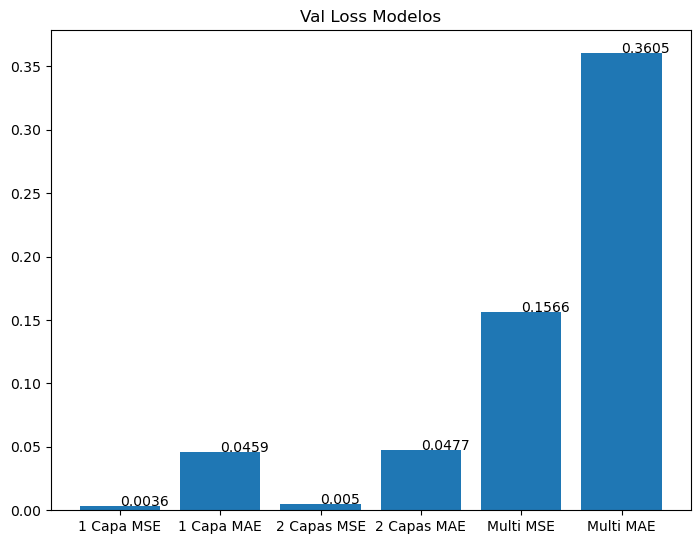

In [56]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Val Loss Modelos")
ejeX = ['1 Capa MSE', '1 Capa MAE','2 Capas MSE','2 Capas MAE','Multi MSE','Multi MAE']
ejeY = [round(vl1,4),round(vl2,4),round(vl3,4),round(vl4,4),round(vl5,4),round(vl6,4)]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

### Conclusiones

* Utilizando el criterio de función de costos, el mejor modelo de red neuronal en este caso en particular es el modelo de una sola capa, optimizado con gradient descent y usando el hiper parámetro de MSE. 

* En todos los modelos, el MSE para funciones de regresión parece obtener los mejores resultados comparado con los modelos que usan MAE como hiper parámetro. Las ventajas de los modelos que usan este hiper p* arámetro es que el MSE penaliza los errores grandes. Adicionalmente, se evidencia que los modelos que usan MSE tienden a tener mayor estabilidad a medida que crece el número de Epochs.

* Finalmente, parece que las redes neuronales multicapas (con capas ocultas) presentan un desempeño significativamente menor comparado con el mejor modelo, lo que sugiere que para esta base de datos en especial, no es necesario agregar más capas al modelo. También se observa que la función de early stopping, aunque computacionalmente eficiente, no permite que el modelo explore un mayor número de epochs, lo que sugiere que a pesar de que estos modelos puedan tener mejores valores en la función de costos con un mayor número de epochs, la función de early stopping no es ideal con modelos que no presentan un comportamiento estable en el val loss con respecto al número de Epochs.